Import Necessary Libraries

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Merging 12 months of sales data into a single file

In [257]:
# df = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

# for file in files:
#     print(file)
    
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

# all_months_data.head()
all_months_data.to_csv("all_data.csv", index=False)

Read in updated dataframe

In [258]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

### Clean up the data!

Drop rows of NaN

In [259]:
nan_df = all_data[all_data.isnull()==True]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

Find 'Or' and delete it

In [260]:
temp.df = all_data[all_data['Order Date'].str[:2] == 'Or']
temp.df.head()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
519   Purchase Address  
1149  Purchase Address  
1155  Purchase Address  
2878  Purchase Address  
2893  Purchase Address

In [261]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

### Augment data with additional columns

### Task 2: Add Month Column

In [262]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

### Task 3: Add a sales column

In [263]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
# all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [264]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

### Task 4: Add a city column

In [265]:
# let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  
0        Dallas (TX)  
2        Boston (MA)  
3   Los Angeles (CA)  
4   Los Angeles (CA)  
5   Los Angeles (CA)

### Question 1: What was the best month for sales? How much was earned that month?

In [266]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [267]:
all_data.describe()

Quantity Ordered     Price Each          Month          Sales
count     185950.000000  185950.000000  185950.000000  185950.000000
mean           1.124383     184.399735       7.059140     185.490917
std            0.442793     332.731330       3.502996     332.919771
min            1.000000       2.990000       1.000000       2.990000
25%            1.000000      11.950000       4.000000      11.950000
50%            1.000000      14.950000       7.000000      14.950000
75%            1.000000     150.000000      10.000000     150.000000
max            9.000000    1700.000000      12.000000    3400.000000

In [268]:
all_data.groupby('Month').sum()

Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06

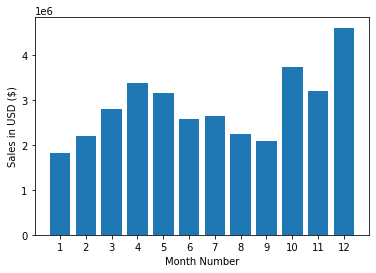

In [269]:
months = range(1, 13)
results = all_data.groupby('Month').sum()

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 2: What city had the highest number of sales?

In [270]:
results = all_data.groupby('City').sum()
results

Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06

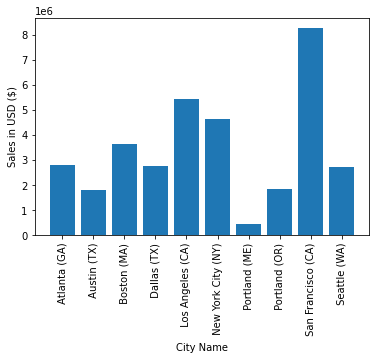

In [271]:
# cities = list(set(all_data['City']))
# cities = all_data['City'].unique()
cities = [city for city, df in all_data.groupby('City')]
results = all_data.groupby('City').sum()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [272]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

                Order Date                         Purchase Address  Month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
2      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
5      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186845 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186846 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186847 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186848 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186849 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  
0        23.90          Dallas (TX)  
2        99.99          Boston (MA)  
3       600.00     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
5        11.99     Los Angeles (CA)  
...        ...                  ...  
186845    8.97     Los Angeles (CA)  
186846  700.00   San Francisco (CA)  
186847  700.00   San Francisco (CA)  
186848  379.99   San Francisco (CA)  
186849   11.95   San Francisco (CA)  

[185950 rows x 9 columns]

In [273]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minute  
0        Dallas (TX)     8      46  
2        Boston (MA)    22      30  
3   Los Angeles (CA)    14      38  
4   Los Angeles (CA)    14      38  
5   Los Angeles (CA)     9      27

In [274]:
all_data.groupby('Hour').count()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Month  Sales   City  Minute  
Hour                                                 
0                 3910   3910   3910   3910    3910  
1                 2350   2350   2350   2350    2350  
2                 1243   1243   1243   1243    1243  
3                  831    831    831    831     831  
4                  854    854    854    854     854  
5                 1321   1321   1321   1321    1321  
6                 2482   2482   2482   2482    2482  
7                 4011   4011   4011   4011    4011  
8                 6256   6256   6256   6256    6256  
9                 8748   8748   8748   8748    8748  
10               10944  10944  10944  10944   10944  
11               12411  12411  12411  12411   12411  
12               12587  12587  12587  12587   12587  
13               12129  12129  12129  12129   12129  
14               10984  10984  10984  10984   10984  
15               10175  10175  10175  10175   10175  
16               10384  10384  10384  10384   10384  
17               10899  10899  10899  10899   10899  
18               12280  12280  12280  12280   12280  
19               12905  12905  12905  12905   12905  
20               12228  12228  12228  12228   12228  
21               10921  10921  10921  10921   10921  
22                8822   8822   8822   8822    8822  
23                6275   6275   6275   6275    6275

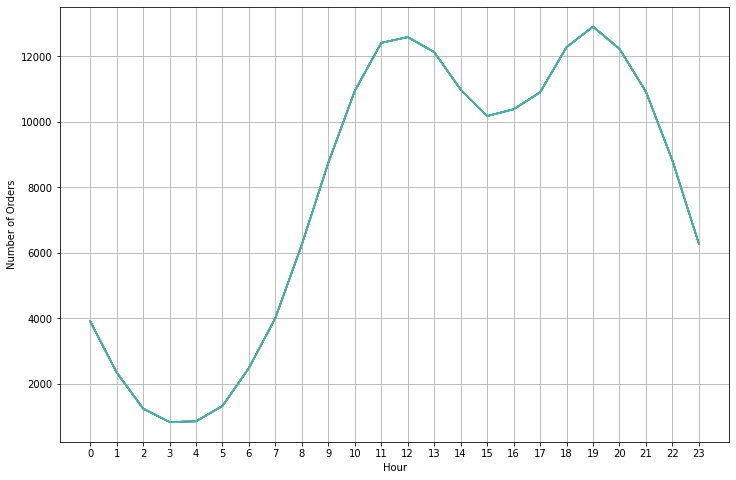

In [275]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(12, 8))
plt.plot(hours, all_data.groupby('Hour').count())
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

Maybe the answer could be around 11 and around 19.

What would be look like if it grouped by cities

<AxesSubplot:xlabel='City'>

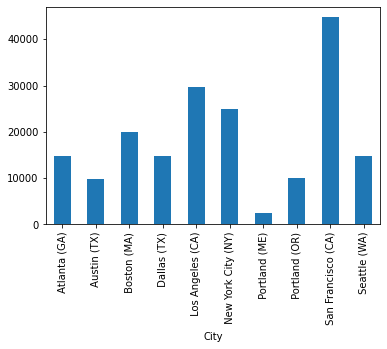

In [276]:
all_data.groupby('City').count()['Order ID'].plot(kind='bar')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


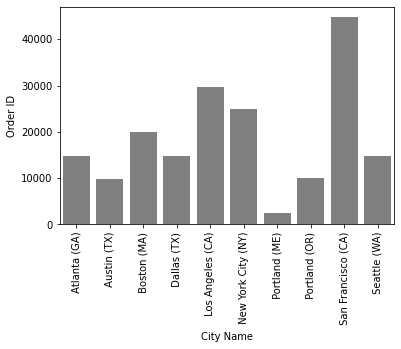

In [277]:
city = [city for city, df in all_data.groupby('City')]
sns.barplot(city, all_data.groupby('City').count()['Order ID'], color='gray')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()
# sns.barplot(x='City', y='Order ID', color='Gray', data=all_data.groupby('City').count())

In [278]:
all_data.groupby('Hour').count()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Month  Sales   City  Minute  
Hour                                                 
0                 3910   3910   3910   3910    3910  
1                 2350   2350   2350   2350    2350  
2                 1243   1243   1243   1243    1243  
3                  831    831    831    831     831  
4                  854    854    854    854     854  
5                 1321   1321   1321   1321    1321  
6                 2482   2482   2482   2482    2482  
7                 4011   4011   4011   4011    4011  
8                 6256   6256   6256   6256    6256  
9                 8748   8748   8748   8748    8748  
10               10944  10944  10944  10944   10944  
11               12411  12411  12411  12411   12411  
12               12587  12587  12587  12587   12587  
13               12129  12129  12129  12129   12129  
14               10984  10984  10984  10984   10984  
15               10175  10175  10175  10175   10175  
16               10384  10384  10384  10384   10384  
17               10899  10899  10899  10899   10899  
18               12280  12280  12280  12280   12280  
19               12905  12905  12905  12905   12905  
20               12228  12228  12228  12228   12228  
21               10921  10921  10921  10921   10921  
22                8822   8822   8822   8822    8822  
23                6275   6275   6275   6275    6275

In [279]:
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

                Order Date                         Purchase Address  Month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
2      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
5      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186845 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186846 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186847 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186848 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186849 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  Hour  Minute  
0        23.90          Dallas (TX)     8      46  
2        99.99          Boston (MA)    22      30  
3       600.00     Los Angeles (CA)    14      38  
4        11.99     Los Angeles (CA)    14      38  
5        11.99     Los Angeles (CA)     9      27  
...        ...                  ...   ...     ...  
186845    8.97     Los Angeles (CA)    20      56  
186846  700.00   San Francisco (CA)    16       0  
186847  700.00   San Francisco (CA)     7      39  
186848  379.99   San Francisco (CA)    17      30  
186849   11.95   San Francisco (CA)     0      18  

[185950 rows x 11 columns]

In [280]:
all_data['City'].unique

<bound method Series.unique of 0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: City, Length: 185950, dtype: object>

In [281]:
all_data['Hour'][all_data['City']==' San Francisco (CA)']

6         13
9         10
17        18
29        20
32        17
          ..
186844    15
186846    16
186847     7
186848    17
186849     0
Name: Hour, Length: 44732, dtype: int64

### Question 4: What products are most often sold together?

In [285]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(20)

<ipython-input-285-bc778191fafa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable
129   176681           Apple Airpods Headphones,ThinkPad Laptop
138   176689  Bose SoundSport Headphones,AAA Batteries (4-pack)
189   176739                34in Ultrawide Monitor,Google Phone
225   176774      Lightning Charging Cable,USB-C Charging Cable
233   176781                    iPhone,Lightning Charging Cable
250   176797  Google Phone,Bose SoundSport Headphones,Wired ...
260   176805                  Google Phone,USB-C Charging Cable
264   176808                      Google Phone,Wired Headphones
270   176813                      Google Phone,Wired Headphones
394   176935            AAA Batteries (4-pack),27in FHD Monitor
435   176975        USB-C Charging Cable,AAA Batteries (4-pack)
450   176989                  Google Phone,USB-C Charging Cable
455   176993                            iPhone,Wired Headphones
485   177022                            iPhone,Wired Headphones
567   177102                      iPhone,27in 4K Gaming Monitor

In [288]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [289]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minute  
0        Dallas (TX)     8      46  
2        Boston (MA)    22      30  
3   Los Angeles (CA)    14      38  
4   Los Angeles (CA)    14      38  
5   Los Angeles (CA)     9      27

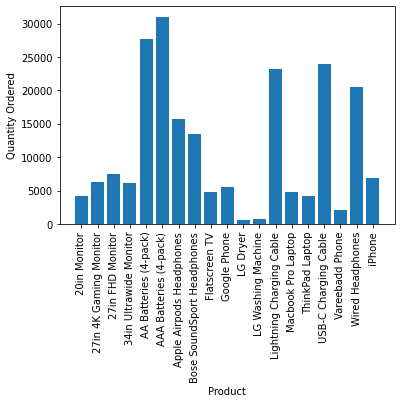

In [320]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [313]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-343-b4c1ffb5a254>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


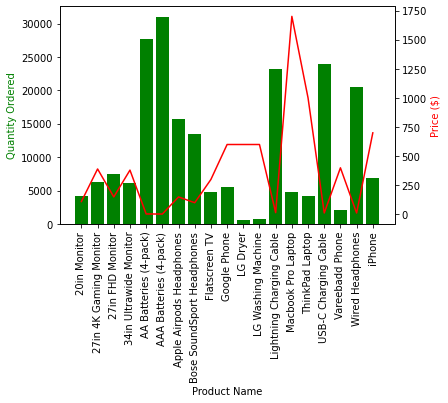

In [343]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'r-')

ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xlabel('Product Name')

ax1.set_xticklabels(products, rotation='vertical')
plt.show()